C:\Users\Vika\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Vika\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[Text(0.5, 1.0, 'Demographic')]

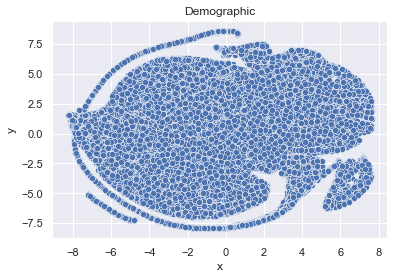

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn import decomposition

np.random.seed(5)
sns.set_theme(style="darkgrid")
X = pd.read_csv('demographic.csv')
X = X.drop(columns=['title', 'genres'])
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(X)
df = pd.DataFrame()
df["x"] = tsne_pca_results[:,0]
df["y"] = tsne_pca_results[:,1]
sns.scatterplot(x="x", y="y",palette=sns.color_palette("hls", 3),data=df).set(title="Demographic") 

Fit model
done in 0.750s.
Predict color indices k-means
done in 0.367s.


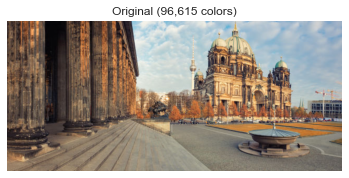

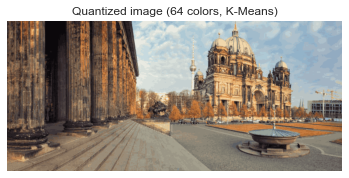

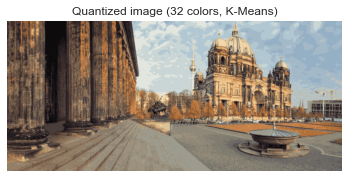

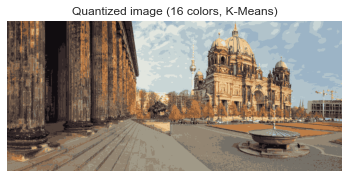

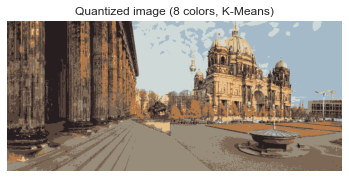

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

berlin = plt.imread("berlin.jpg")
berlin = np.array(berlin, dtype=np.float64) / 255
w, h, d = original_shape = tuple(berlin.shape)
assert d == 3
image_array = np.reshape(berlin, (w * h, d))
print("Fit model")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans64 = KMeans(n_clusters=64, random_state=0).fit(image_array_sample)
kmeans32 = KMeans(n_clusters=32, random_state=0).fit(image_array_sample)
kmeans16 = KMeans(n_clusters=16, random_state=0).fit(image_array_sample)
kmeans8 = KMeans(n_clusters=8, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")
print("Predict color indices k-means")
t0 = time()
labels64 = kmeans64.predict(image_array)
labels32 = kmeans32.predict(image_array)
labels16 = kmeans16.predict(image_array)
labels8 = kmeans8.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original (96,615 colors)")
plt.imshow(berlin)
plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image (64 colors, K-Means)")
plt.imshow(recreate_image(kmeans64.cluster_centers_, labels64, w, h))
plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image (32 colors, K-Means)")
plt.imshow(recreate_image(kmeans32.cluster_centers_, labels32, w, h))
plt.figure(4)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image (16 colors, K-Means)")
plt.imshow(recreate_image(kmeans16.cluster_centers_, labels16, w, h))
plt.figure(5)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image (8 colors, K-Means)")
plt.imshow(recreate_image(kmeans8.cluster_centers_, labels8, w, h))

C:\Users\Vika\AppData\Local\Temp/ipykernel_9284/3010791021.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  x1 = np.random.default_rng().multivariate_normal(mean1, cov1, 1000)
C:\Users\Vika\AppData\Local\Temp/ipykernel_9284/3010791021.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  x2 = np.random.default_rng().multivariate_normal(mean2, cov2, 1000)


<AxesSubplot:>

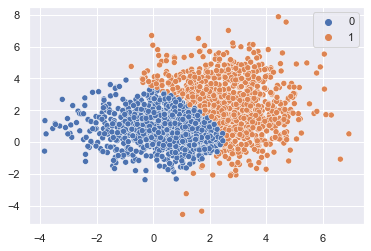

In [11]:
from sklearn.mixture import GaussianMixture

mean1 = [1, 1]
cov1 = [[0, 3],
        [1, 0]]
mean2 = [2, 2]
cov2 = [[2, 1],
        [0, 3]]
x1 = np.random.default_rng().multivariate_normal(mean1, cov1, 1000)
x2 = np.random.default_rng().multivariate_normal(mean2, cov2, 1000)
df = np.vstack([x1,x2])
gm = GaussianMixture(n_components=2, covariance_type='diag')
labels = gm.fit_predict(df)
sns.scatterplot(x=df[:,0], y=df[:,1], hue=labels)

<AxesSubplot:>

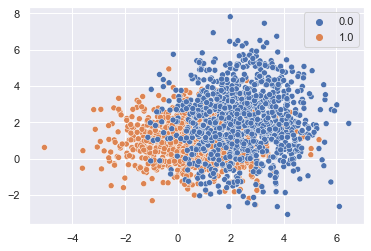

In [12]:
gm.covariances_[0]
x1 = np.random.default_rng().multivariate_normal(gm.means_[0], np.diag(gm.covariances_[0]), 1000)
x2 = np.random.default_rng().multivariate_normal(gm.means_[1], np.diag(gm.covariances_[1]), 1000)
df = np.vstack([x1,x2])
sns.scatterplot(x=df[:,0], y=df[:,1], hue=np.hstack([np.ones((1000)),np.zeros((1000))]))

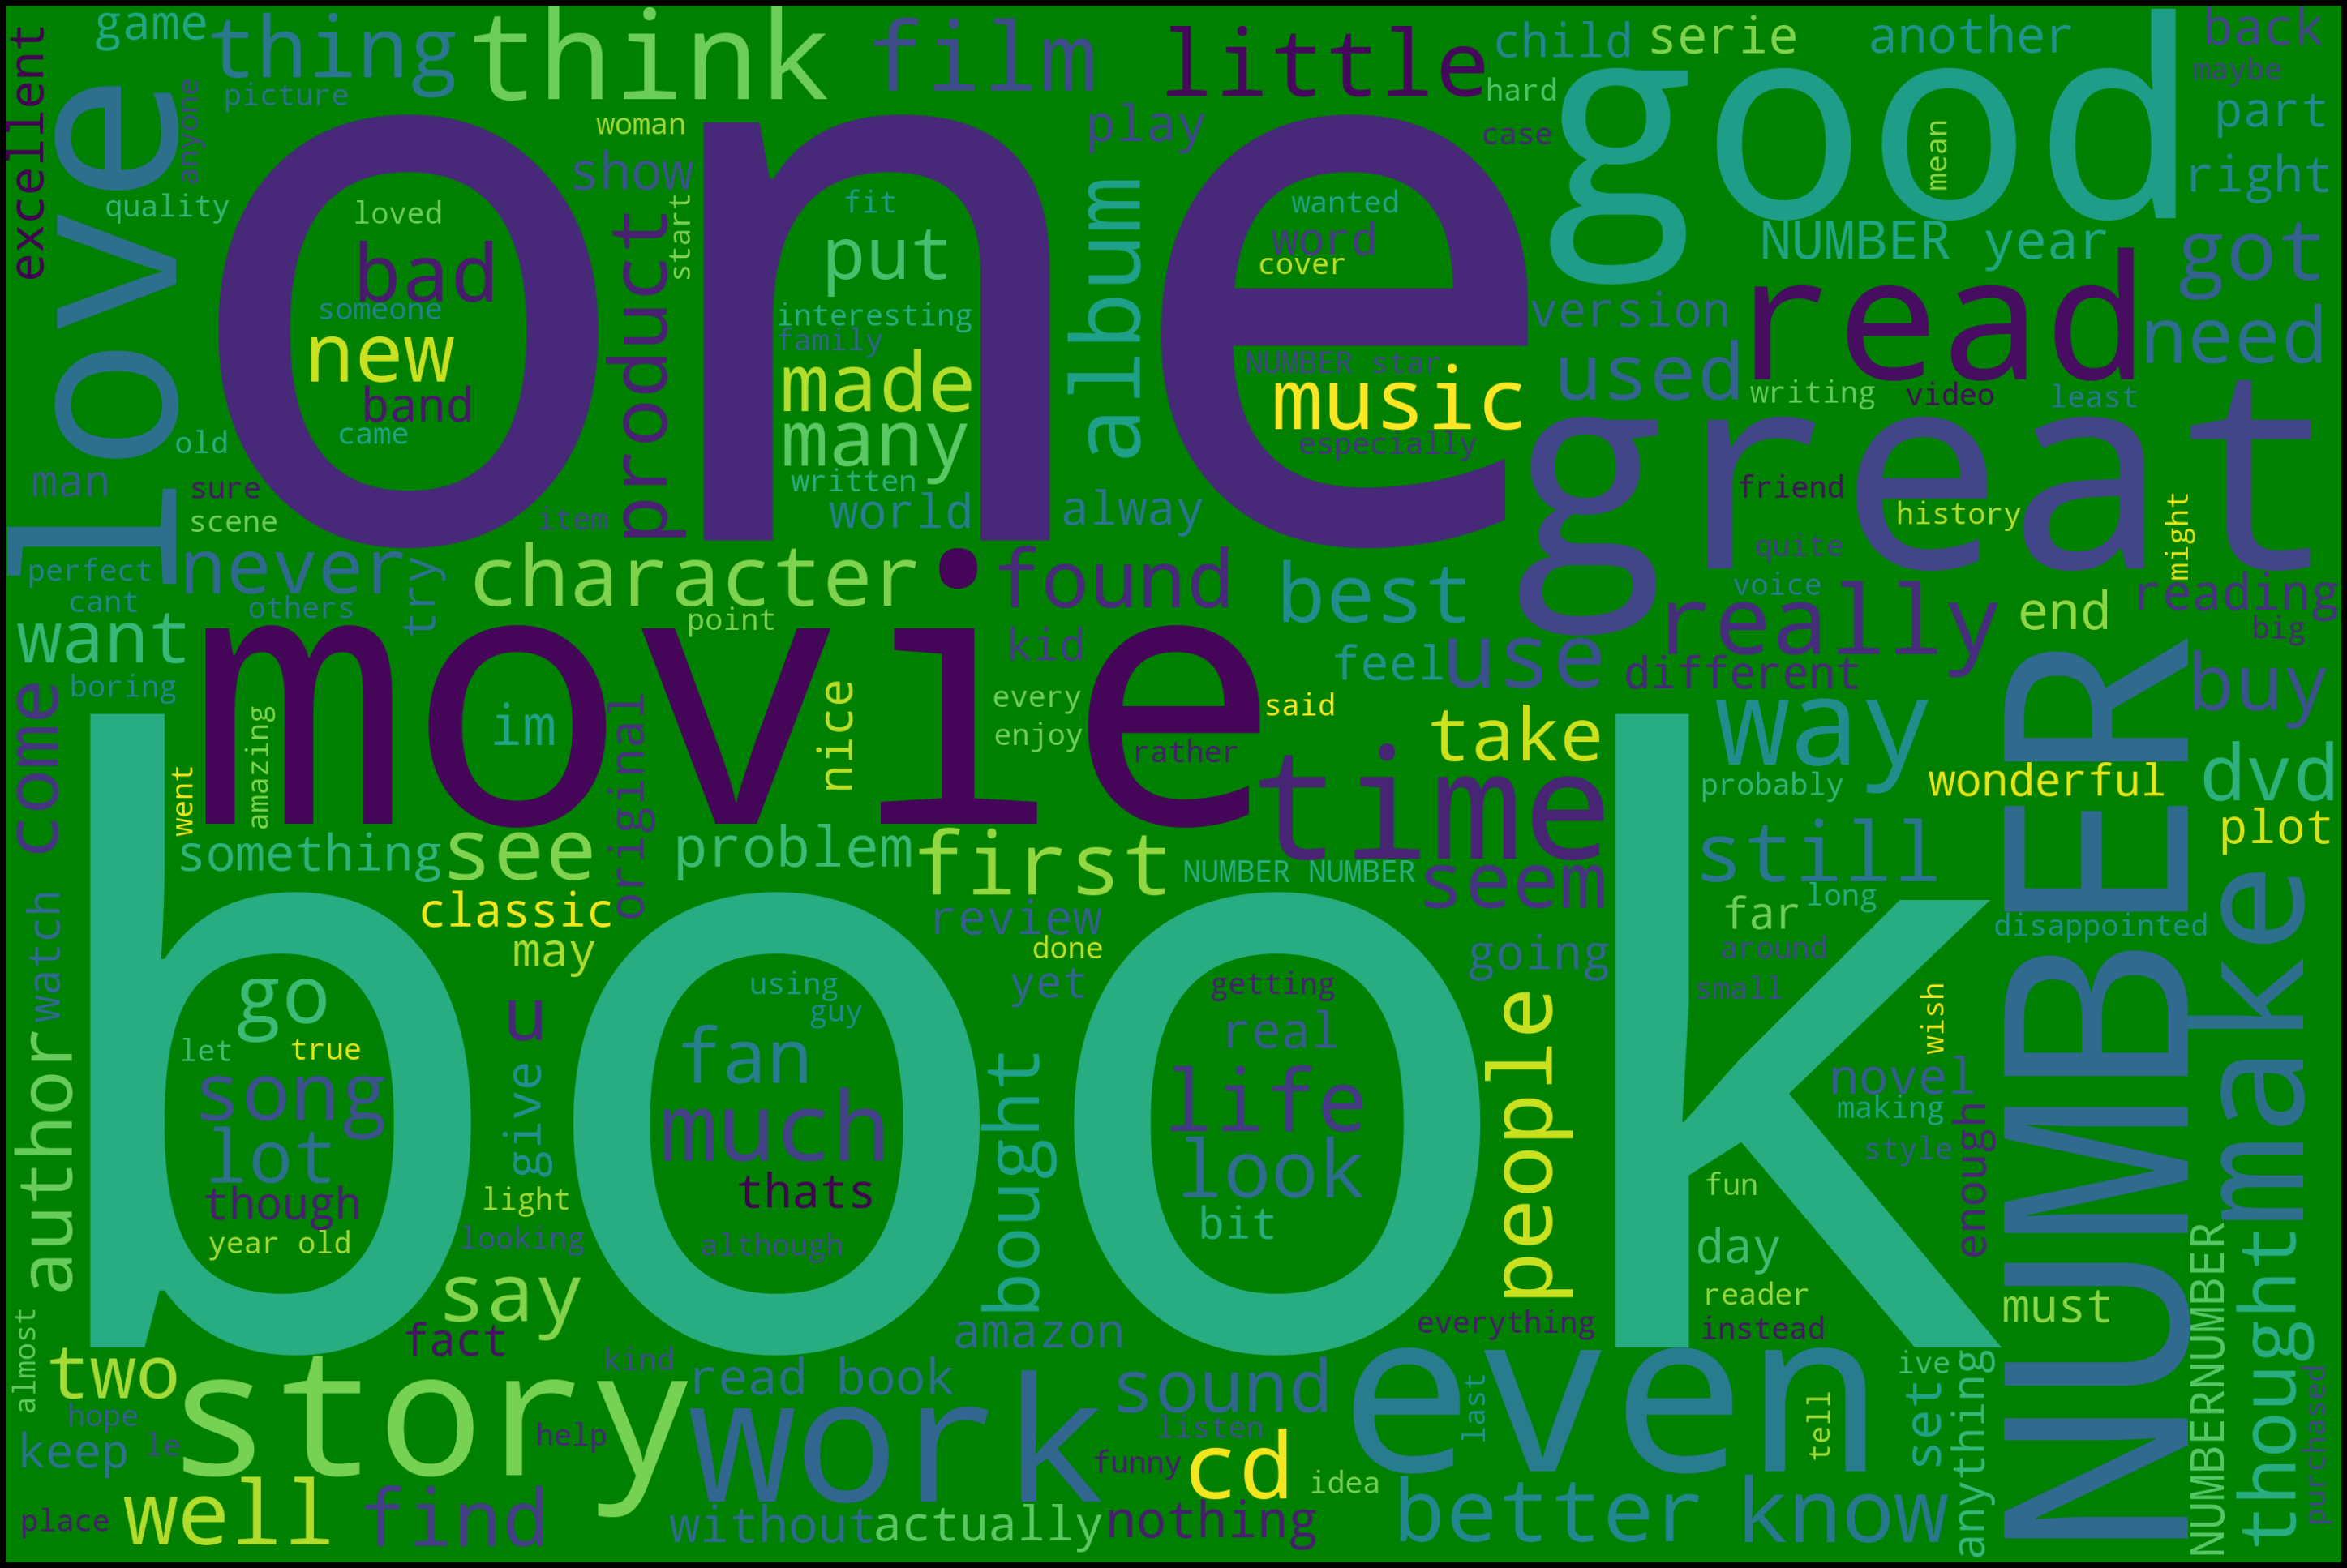

In [7]:
import string
import pandas as pd
import re
#import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#nltk.download('stopwords')
#nltk.download('wordnet')
pd.set_option('max_colwidth', 400)
amazon = open('amazon.txt', 'r', encoding="utf8").readlines()
amazon = list(map(lambda x: x.lower().strip(), amazon))
amazon = list(map(lambda x: re.sub(r"(\d+)", 'NUMBER', x), amazon))
stop_words = stopwords.words('english')
amazon = list(map(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]), amazon))
table = str.maketrans('', '', string.punctuation)
amazon = list(map(lambda x: x.translate(table), amazon))
lemmatizer = WordNetLemmatizer()
amazon = list(map(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]), amazon))

def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'green').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

generate_word_cloud(''.join(amazon))

In [8]:
X = TfidfVectorizer(max_features=5000).fit_transform(amazon)
y = amazon
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB().fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 0.0%
